In [1]:
import matplotlib.pyplot as plt
import numpy as np
from muca.model.p_body_ising import PBodyTwoDimIsing
from muca.algorithm.wang_landau import WangLandau
from muca.algorithm.parameters import WangLandauParameters
from muca.results.analysis import Analyzer

In [2]:
p = 3
L = 6
S = 2

In [3]:
result_metropolis = WangLandau.run(
    model=PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S),
    parameters=WangLandauParameters(
        modification_criterion=1e-08,
        convergence_check_interval=100,
        num_divided_energy_range=2,
        overlap_rate = 0.4,
        flatness_criterion = 0.9,
        update_method="METROPOLIS",
    ),
    num_threads=2,
    calculate_order_parameters=True,
    backend = "cpp"
)

Running Wang-Landau simulation by cpp ...
Done simulation (34.2) [sec] by cpp


In [4]:
result_heat = WangLandau.run(
    model=PBodyTwoDimIsing(J=-1, p=p, Lx=L, Ly=L, spin=S, spin_scale_factor=1/S),
    parameters=WangLandauParameters(
        modification_criterion=1e-08,
        convergence_check_interval=100,
        num_divided_energy_range=2,
        overlap_rate = 0.4,
        flatness_criterion = 0.9,
        update_method="HEAT_BATH",
    ),
    num_threads=2,
    calculate_order_parameters=True,
    backend = "cpp"
)

Running Wang-Landau simulation by cpp ...
Done simulation (15.9) [sec] by cpp


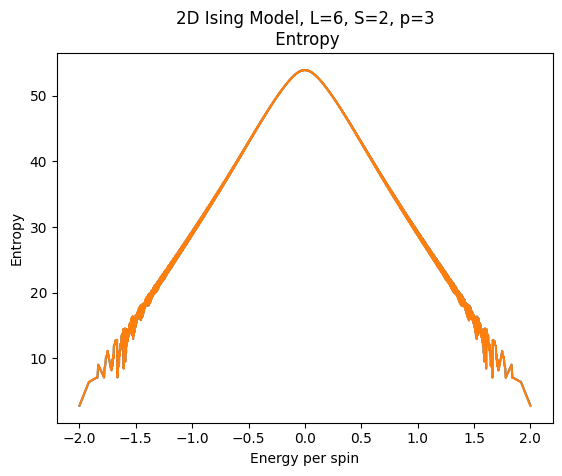

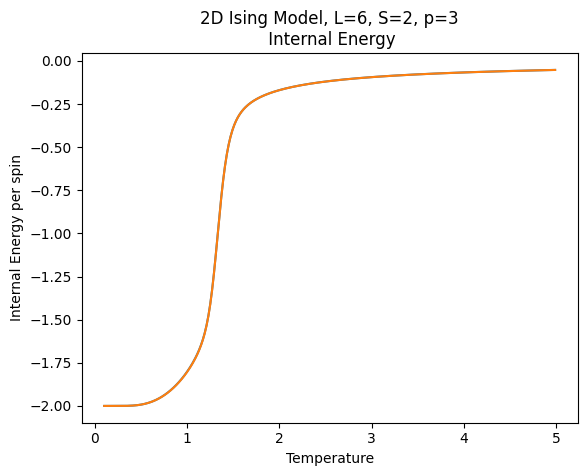

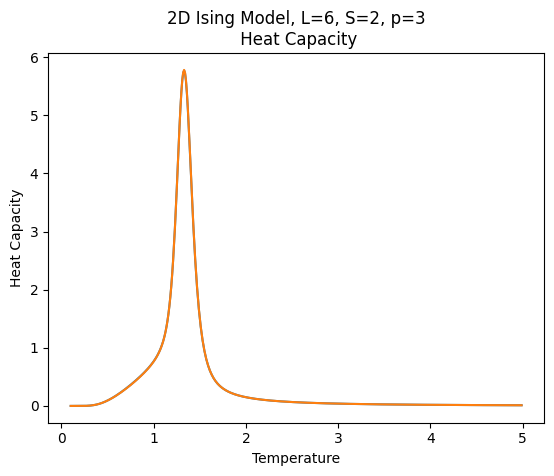

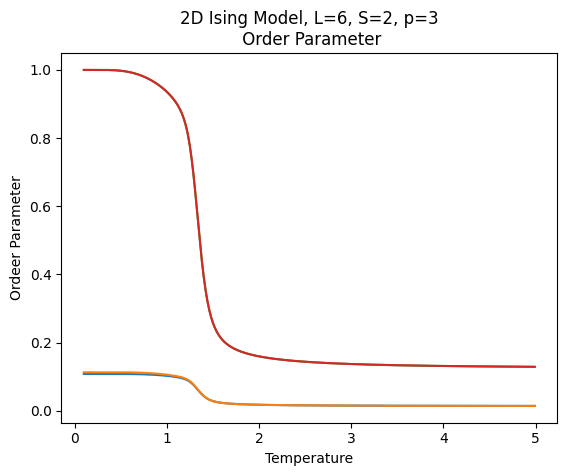

In [5]:
N = result_metropolis.model.Lx*result_metropolis.model.Ly
plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Entropy")
plt.plot(result_metropolis.energies/N, result_metropolis.entropies)
plt.plot(result_heat.energies/N, result_heat.entropies)
plt.xlabel("Energy per spin")
plt.ylabel("Entropy")
plt.show()

temperature = np.arange(0.1, 5, 0.01)
plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Internal Energy")
u1 = Analyzer.calculate_expectation(result_metropolis.energies, result_metropolis.entropies, temperature, result_metropolis.energies)/N
u2 = Analyzer.calculate_expectation(result_heat.energies, result_heat.entropies, temperature, result_heat.energies)/N
plt.plot(temperature, u1)
plt.plot(temperature, u2)
plt.xlabel("Temperature")
plt.ylabel("Internal Energy per spin")
plt.show()

plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Heat Capacity")
c1 = Analyzer.calculate_heat_capacity(result_metropolis.energies, result_metropolis.entropies, temperature)/N
c2 = Analyzer.calculate_heat_capacity(result_heat.energies, result_heat.entropies, temperature)/N
plt.plot(temperature, c1)
plt.plot(temperature, c2)
plt.xlabel("Temperature")
plt.ylabel("Heat Capacity")
plt.show()

plt.title(f"2D Ising Model, L={L}, S={S}, p={p}\n Order Parameter")
o1 = Analyzer.calculate_expectation(
    result_metropolis.energies, 
    result_metropolis.entropies, 
    temperature, 
    result_metropolis.order_parameters.squared_magnetization
)
o2 = Analyzer.calculate_expectation(
    result_heat.energies, 
    result_heat.entropies, 
    temperature, 
    result_heat.order_parameters.squared_magnetization
)
plt.plot(temperature, o1)
plt.plot(temperature, o2)
o1 = Analyzer.calculate_expectation(
    result_metropolis.energies, 
    result_metropolis.entropies, 
    temperature, 
    result_metropolis.order_parameters.abs_fourier_second
)
o2 = Analyzer.calculate_expectation(
    result_heat.energies, 
    result_heat.entropies, 
    temperature, 
    result_heat.order_parameters.abs_fourier_second
)
plt.plot(temperature, o1)
plt.plot(temperature, o2)
plt.xlabel("Temperature")
plt.ylabel("Ordeer Parameter")
plt.show()
